In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, MeanShift

from sklearn import metrics
import matplotlib.pyplot as plt

# Python Imaging Library
from PIL import Image

from scipy.spatial.distance import cdist

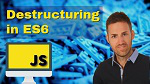

In [2]:
image = Image.open('destructuring.jpg')
pixels = image.load()
image

In [3]:
import pandas
data_frame = pandas.DataFrame(
    [[x,y,pixels[x,y][0], pixels[x,y][1],
pixels[x,y][2]]
        for x in range(image.size[0])
        for y in range(image.size[1])
    ], columns=['x','y','r','g','b']
)


In [4]:
mean_shift_model = MeanShift()
mean_shift_model.fit(data_frame)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [6]:
for i in range(len(mean_shift_model.cluster_centers_)):
    image = Image.open('destructuring.jpg')
    pixels = image.load()
    for j in range(len(data_frame)):
        if (mean_shift_model.labels_[j] != i ):
            pixels[ int(data_frame['x'][j]), int(data_frame['y'][j]) ] = (255, 255,255)
    image.save( 'cluster' + str(i) + '.jpg' )

In [26]:
k_means_model = KMeans(n_clusters=3) 
k_means_model.fit(data_frame)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
for i in range(len(k_means_model.cluster_centers_)):
    image = Image.open('destructuring.jpg')
    pixels = image.load()
    for j in range(len(data_frame)):
        if (k_means_model.labels_[j] != i):
            pixels[int(data_frame['x'][j]), int(data_frame['y'][j])] = (255, 255, 255)
    image.save('kmeanscluster' + str(i) + '.jpg')


In [14]:
distortions = []
K = range(2,20)
for k in K:
    model = KMeans(n_clusters=k).fit(data_frame)
    model.fit(data_frame)
    distortions.append(sum(np.min(cdist(data_frame, model.cluster_centers_, 'euclidean'), axis=1)) / data_frame.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [105.05618355418224, 76.70161118302842, 68.7861403010897, 63.012104249072955, 57.723988005891506, 52.51681245718534, 50.36421649168896, 48.414913947637544, 46.15934697006488, 44.54598516515534, 43.01728684877087, 41.78977555155553, 40.562729284390464, 39.32186973384389, 38.67152263420417, 37.605112868861546, 36.666759493253956, 36.08376085750019]


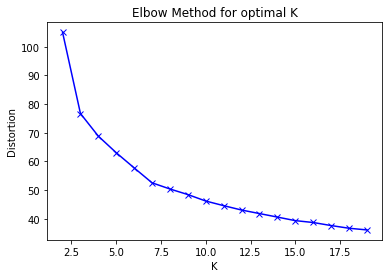

In [15]:
plt.title('Elbow Method for optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

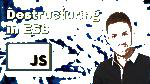

In [28]:
clustered_image0 = Image.open('kmeanscluster0.jpg')
clustered_image0